## Aprendizado Não Supervisionado - Redução de Dimensionalidade
#### Prof. Thomas da Silva Paula

### t-SNE - Demo 2

* Utilização do algoritmo t-SNE em caso de uso com imagens.
* Features da ResNet18 da base de dados do Trabalho II.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

%matplotlib inline

plt.rcParams['figure.figsize'] = (14, 8)

sns.set(font_scale=2)

### Carregar features e classes

In [2]:
with open('../datasets/features/resnet18_features.npy', 'rb') as f:
    resnet18_features = np.load(f)
    
print(resnet18_features.shape)

(800, 512)


In [3]:
with open('../datasets/features/labels.npy', 'rb') as f:
    labels = np.load(f)
    
print(labels.shape)

(800,)


In [4]:
class_map = {
    0: 'airplane',
    1: 'car',
    2: 'cat',
    3: 'dog',
    4: 'flower',
    5: 'fruit',
    6: 'motorbike',
    7: 'person'
}

In [5]:
labels_mapped = [class_map[i] for i in labels]
print(np.unique(labels_mapped))

['airplane' 'car' 'cat' 'dog' 'flower' 'fruit' 'motorbike' 'person']


### Aplicar t-SNE

In [6]:
%%time
tsne = TSNE(perplexity=30)
features_transformed = tsne.fit_transform(resnet18_features)
print(features_transformed.shape)

(800, 2)
Wall time: 3.42 s


In [7]:
df = pd.DataFrame(features_transformed, columns=['x', 'y'])
df['label'] = labels_mapped
df.head()

,x,y,label
0,-39.959675,-5.185418,airplane
1,-41.735287,-6.442068,airplane
2,-45.321938,-7.497560,airplane
3,-46.204453,-7.181923,airplane
4,-44.720711,-8.143112,airplane


### Plotar resultados

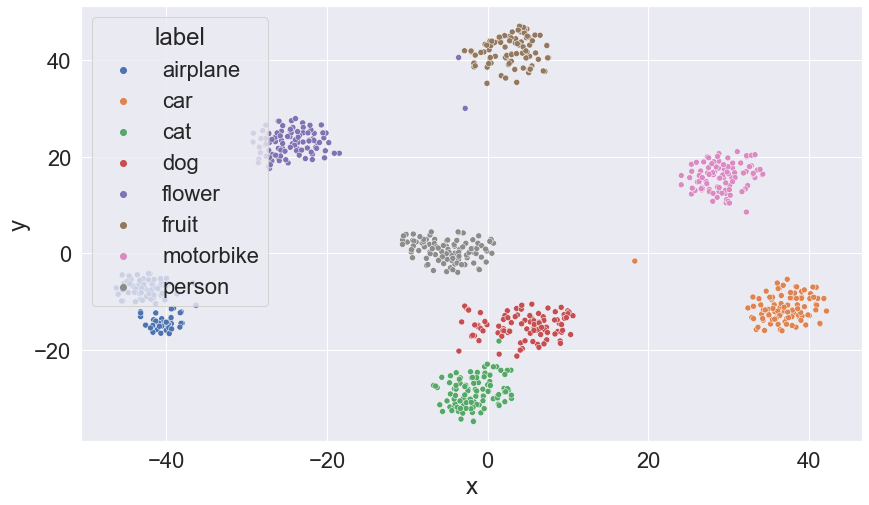

In [8]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='deep', legend='full')

### Testando hiperparâmetros

Variando perplexity

In [9]:
def run_tsne_and_plot(perplexity, features, labels_mapped):
    tsne = TSNE(perplexity=perplexity)
    features_transformed = tsne.fit_transform(resnet18_features)
    
    df = pd.DataFrame(features_transformed, columns=['x', 'y'])
    df['label'] = labels_mapped
    
    _ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='deep', legend='full')
    plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

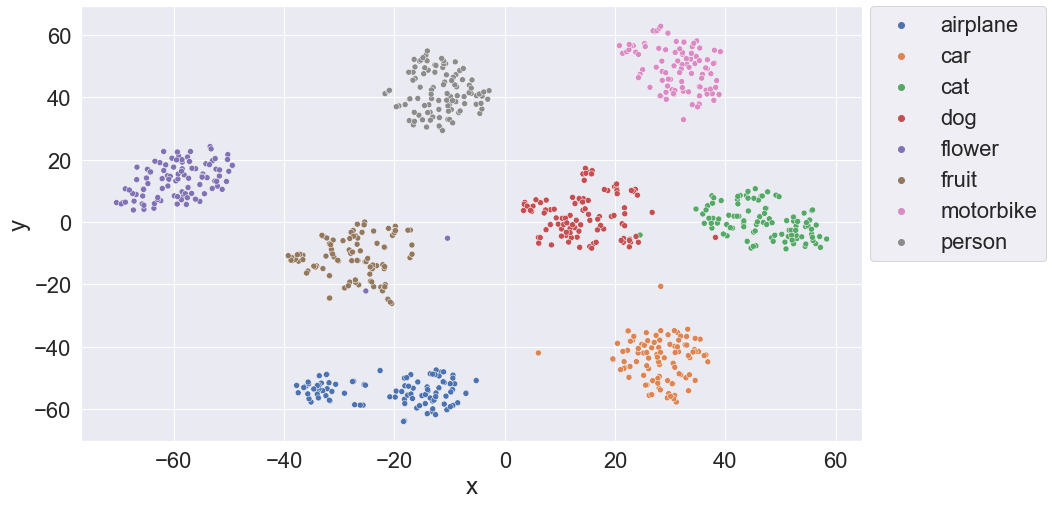

In [10]:
run_tsne_and_plot(10, resnet18_features, labels_mapped)

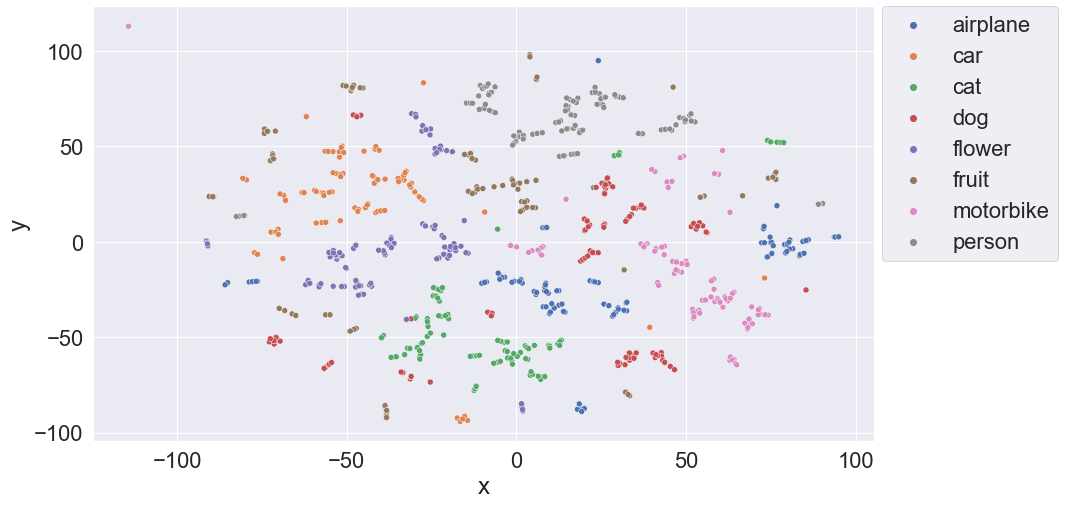

In [11]:
run_tsne_and_plot(1, resnet18_features, labels_mapped)

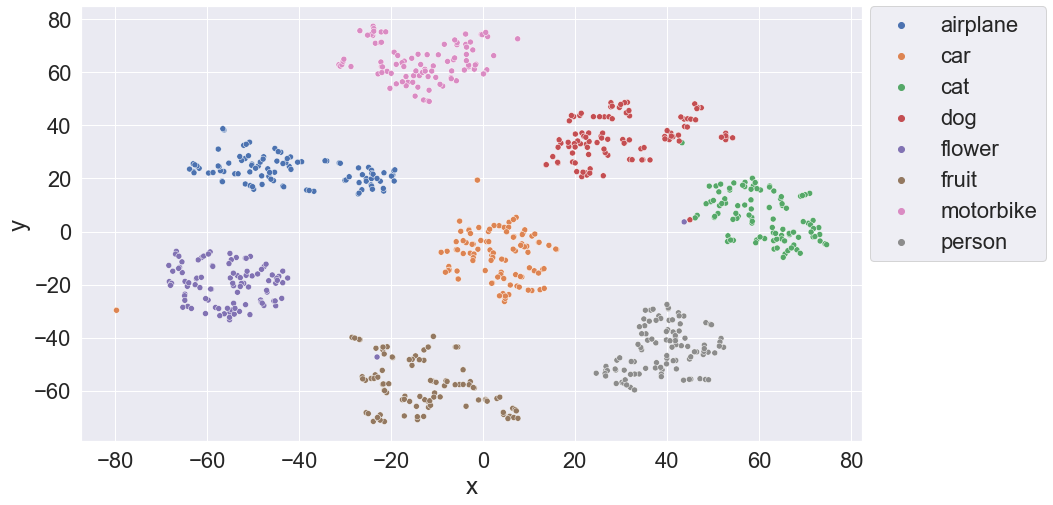

In [12]:
run_tsne_and_plot(5, resnet18_features, labels_mapped)

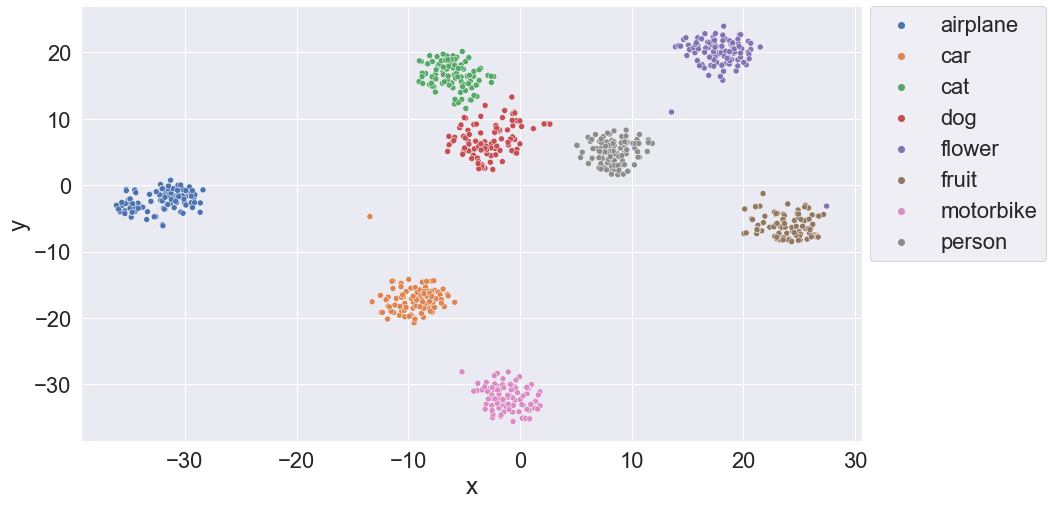

In [13]:
run_tsne_and_plot(50, resnet18_features, labels_mapped)